In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
import pandas_profiling
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, recall_score, precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix, average_precision_score,recall_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pwd()

'C:\\Users\\Somesh\\Jupyter_Python\\RP_Practicals'

In [3]:
#print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

In [4]:
rpTestData = pd.read_csv('Default_On_Payment.csv')

# Exploratory Data Analysis

In [5]:
pandas_profiling.ProfileReport(rpTestData)

Number of variables,22
Number of observations,40121
Total Missing (%),0.0%
Total size in memory,6.7 MiB
Average record size in memory,176.0 B
Numeric,7
Categorical,15
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [6]:
rpTestData.describe()

,Customer_ID,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents,Default_On_Payment
count,40120.000000,40120.000000,40120.000000,40119.000000,40119.000000,40119.000000,40119.000000
mean,552095.364008,2.973330,2.845015,35.540442,1.407014,1.154889,0.299135
std,261369.698286,1.118042,1.103126,11.366368,0.577355,0.361804,0.457885
min,100015.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,325155.250000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,551443.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000
75%,778207.750000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,999961.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


In [7]:
print('Counts of Labels')
rpTestData.groupby("Default_On_Payment").size()

Counts of Labels


Default_On_Payment
0.0    28118
1.0    12001
dtype: int64

# Data Visualization

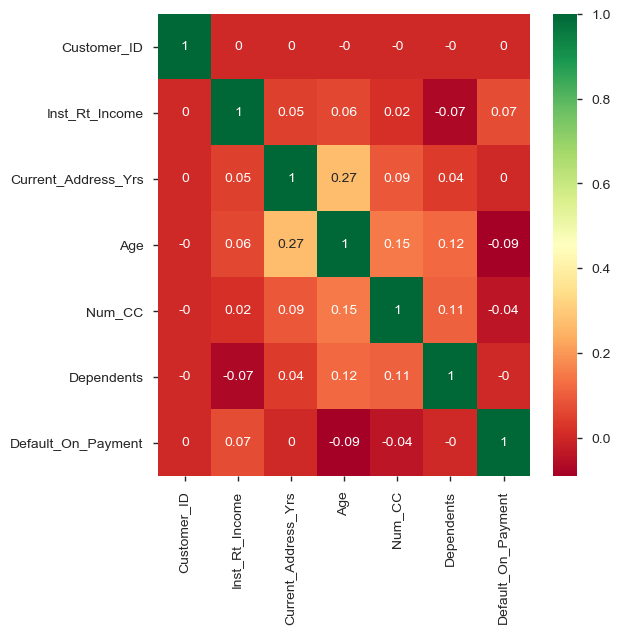

In [8]:
# compute the pair wise correlation for all columns  
correlation_matrix = rpTestData.corr().round(2)
plt.subplots(figsize=(6,6))
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, cmap='RdYlGn',annot=True)
plt.show();

In [9]:
rpTestData.info()
rpTestData.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40121 entries, 0 to 40120
Data columns (total 22 columns):
Customer_ID                    40120 non-null float64
Status_Checking_Acc            40121 non-null object
Duration_in_Months             40121 non-null object
Credit_History                 40121 non-null object
Purposre_Credit_Taken          40120 non-null object
Credit_Amount                  40120 non-null object
Savings_Acc                    40120 non-null object
Years_At_Present_Employment    40120 non-null object
Inst_Rt_Income                 40120 non-null float64
Marital_Status_Gender          40120 non-null object
Other_Debtors_Guarantors       40120 non-null object
Current_Address_Yrs            40120 non-null float64
Property                       40119 non-null object
Age                            40119 non-null float64
Other_Inst_Plans               40119 non-null object
Housing                        40119 non-null object
Num_CC                         40119 no

Index(['Customer_ID', 'Status_Checking_Acc', 'Duration_in_Months',
       'Credit_History', 'Purposre_Credit_Taken', 'Credit_Amount',
       'Savings_Acc', 'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans ',
       'Housing', 'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker',
       'Default_On_Payment'],
      dtype='object')

In [10]:
# Separate out independent categorical variables for conversion into numerical
x_catg = rpTestData.loc[:,('Status_Checking_Acc', 'Duration_in_Months','Credit_History', 'Purposre_Credit_Taken', 'Credit_Amount','Savings_Acc', 'Years_At_Present_Employment','Marital_Status_Gender', 'Other_Debtors_Guarantors','Property', 'Other_Inst_Plans ','Housing', 'Job', 'Telephone', 'Foreign_Worker')]
x_catg.head()
x_catg.shape

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Marital_Status_Gender,Other_Debtors_Guarantors,Property,Other_Inst_Plans,Housing,Job,Telephone,Foreign_Worker
0,A14,27,A32,A40,2570,A61,A73,A92,A101,A121,A143,A151,A173,A191,A201
1,A11,12,A34,A43,385,A61,A74,A92,A101,A121,A143,A152,A172,A192,A201
2,A12,13,A34,A43,882,A61,A72,A93,A103,A121,A143,A152,A173,A191,A201
3,A14,24,A32,A40,1393,A61,A73,A93,A103,A121,A143,A152,A173,A192,A201
4,A11,24,A32,A40,3123,A61,A72,A92,A101,A122,A143,A152,A173,A191,A201


(40121, 15)

In [11]:
# Separate out independent numerical variables
x_num = rpTestData.loc[:,('Inst_Rt_Income','Current_Address_Yrs','Age','Num_CC','Dependents')]
x_num.head()
x_num.shape

,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents
0,3.0,3.0,21.0,1.0,1.0
1,4.0,3.0,58.0,4.0,1.0
2,4.0,4.0,23.0,2.0,1.0
3,2.0,2.0,31.0,1.0,1.0
4,4.0,1.0,27.0,1.0,1.0


(40121, 5)

In [12]:
#Convert cateforical vars to dummy coding
x_num1 = pd.get_dummies(x_catg)
x_num1.head()
x_num1.shape

,Status_Checking_Acc_2,Status_Checking_Acc_A11,Status_Checking_Acc_A12,Status_Checking_Acc_A13,Status_Checking_Acc_A14,Duration_in_Months_4,Duration_in_Months_5,Duration_in_Months_6,Duration_in_Months_7,Duration_in_Months_8,...,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A191,Telephone_A192,Foreign_Worker_A201,Foreign_Worker_A202
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,1,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0


(40121, 1971)

In [13]:
#Get all xc together
x1 = pd.concat([x_num1,x_num],axis=1)
x1.head()
x1.columns
x1.shape

,Status_Checking_Acc_2,Status_Checking_Acc_A11,Status_Checking_Acc_A12,Status_Checking_Acc_A13,Status_Checking_Acc_A14,Duration_in_Months_4,Duration_in_Months_5,Duration_in_Months_6,Duration_in_Months_7,Duration_in_Months_8,...,Job_A174,Telephone_A191,Telephone_A192,Foreign_Worker_A201,Foreign_Worker_A202,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,3.0,3.0,21.0,1.0,1.0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,4.0,3.0,58.0,4.0,1.0
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,4.0,4.0,23.0,2.0,1.0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,2.0,2.0,31.0,1.0,1.0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,4.0,1.0,27.0,1.0,1.0


Index(['Status_Checking_Acc_2', 'Status_Checking_Acc_A11',
       'Status_Checking_Acc_A12', 'Status_Checking_Acc_A13',
       'Status_Checking_Acc_A14', 'Duration_in_Months_4',
       'Duration_in_Months_5', 'Duration_in_Months_6', 'Duration_in_Months_7',
       'Duration_in_Months_8',
       ...
       'Job_A174', 'Telephone_A191', 'Telephone_A192', 'Foreign_Worker_A201',
       'Foreign_Worker_A202', 'Inst_Rt_Income', 'Current_Address_Yrs', 'Age',
       'Num_CC', 'Dependents'],
      dtype='object', length=1976)

(40121, 1976)

In [14]:
x = x1.fillna(x1.median())
x.shape

(40121, 1976)

In [15]:
x = x.dropna(how='any')
x.shape

(40119, 1976)

,Status_Checking_Acc_2,Status_Checking_Acc_A11,Status_Checking_Acc_A12,Status_Checking_Acc_A13,Status_Checking_Acc_A14,Duration_in_Months_4,Duration_in_Months_5,Duration_in_Months_6,Duration_in_Months_7,Duration_in_Months_8,...,Job_A174,Telephone_A191,Telephone_A192,Foreign_Worker_A201,Foreign_Worker_A202,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,3.0,3.0,21.0,1.0,1.0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,4.0,3.0,58.0,4.0,1.0
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,4.0,4.0,23.0,2.0,1.0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,2.0,2.0,31.0,1.0,1.0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,4.0,1.0,27.0,1.0,1.0
5,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,3.0,4.0,52.0,1.0,1.0
6,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1.0,2.0,40.0,2.0,2.0
7,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,4.0,4.0,52.0,2.0,1.0
8,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,4.0,2.0,25.0,1.0,1.0
9,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,2.0,2.0,26.0,1.0,1.0


In [16]:
#Create Dependent Variable
y = rpTestData['Default_On_Payment']
y.head()
y.shape

0    1.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: Default_On_Payment, dtype: float64

(40121,)

In [17]:
y = y.dropna(how='any')
y.head()
y.shape

0    1.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: Default_On_Payment, dtype: float64

(40119,)

# Now start building the models using this converted data

In [18]:
#Lets try a decision tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=1)
X_train.shape
X_test.shape
y_train.shape
y_test.shape
type(X_train)

(28083, 1976)

(12036, 1976)

(28083,)

(12036,)

pandas.core.frame.DataFrame

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="gini",max_depth=5)
dt.fit(X_train,y_train)
classes = dt.predict(X_test)
auc = metrics.roc_auc_score(y_test, classes)
auc

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

0.668264204152815

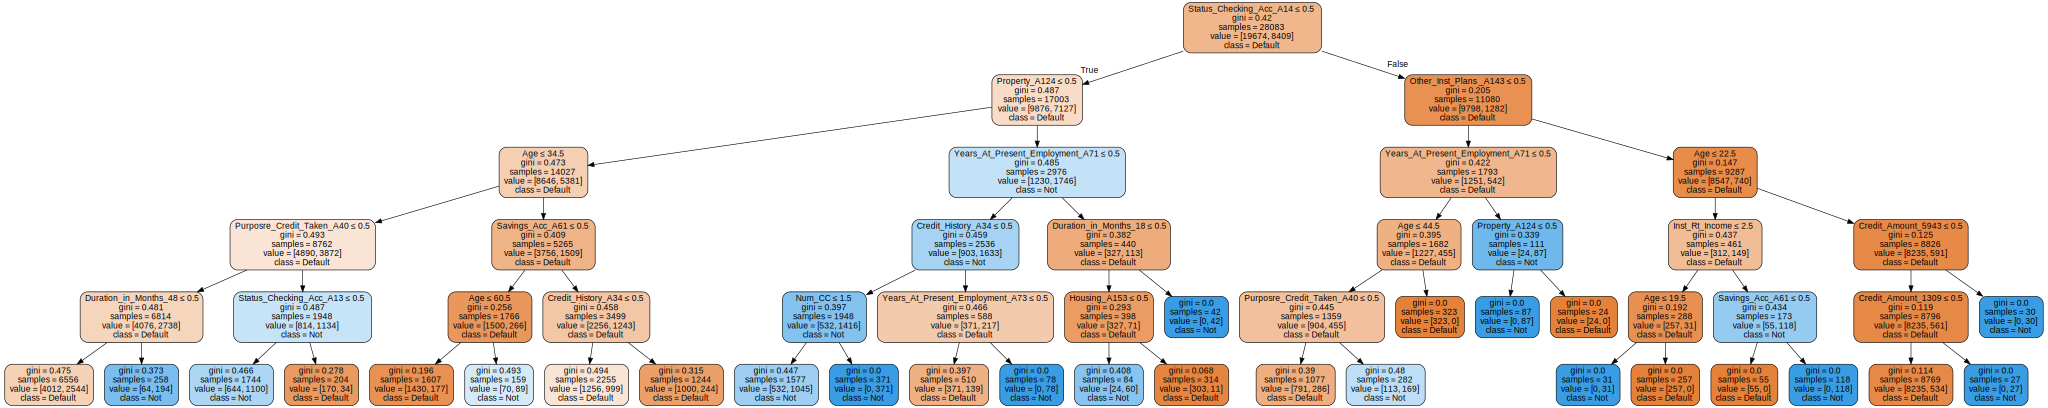

In [ ]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(dt, out_file=None,
                               feature_names=X_train.columns,
                               class_names=['Default','Not'],
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
#Precision and Recall
print('Accuracy Score')
print(metrics.accuracy_score(y_test,classes))
print('Precision/Recall Metrices')
print(metrics.classification_report(y_test,classes))
print('AUC')
print(metrics.roc_auc_score(y_test,classes))

Accuracy Score
0.7726819541375872
Precision/Recall Metrices
              precision    recall  f1-score   support

         0.0       0.79      0.93      0.85      8444
         1.0       0.71      0.41      0.52      3592

   micro avg       0.77      0.77      0.77     12036
   macro avg       0.75      0.67      0.68     12036
weighted avg       0.76      0.77      0.75     12036

AUC
0.668264204152815


Text(0.5, 1.0, 'ROCR CHART')

(0, 1)

(0, 1)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

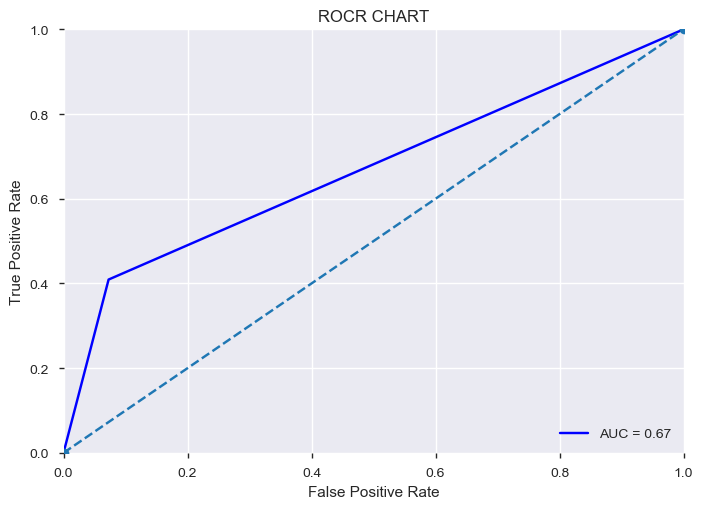

In [ ]:
#ROC Chart
fpr, tpr, th = roc_curve(y_test,classes)
roc_auc = metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion Matrix


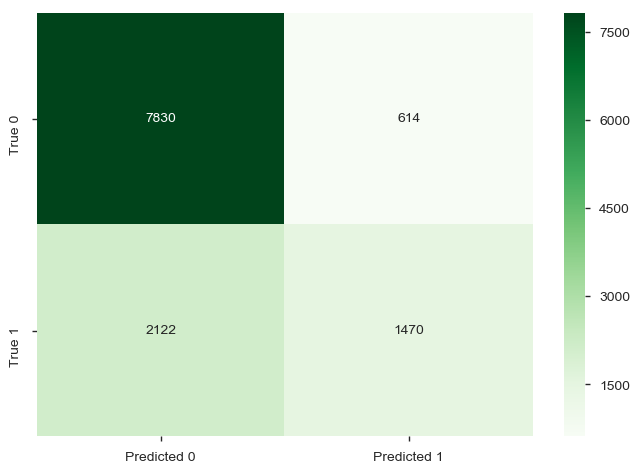

In [ ]:
#Confusion Matrix
print("Confusion Matrix")
cf = metrics.confusion_matrix(y_test,classes)
lbl1 = ["Predicted 0","Predicted 1"]
lbl2 = ["True 0", "True 1"]
sns.heatmap(cf, annot=True, cmap="Greens", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()

## Hyper-parameters Optimization using Gridsearch and Crossvalidation

In [ ]:
svc = SVC()
svc.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto_deprecated',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
param_grid = [{'C':[0.01,1,10,100,1000],
              'kernel':['linear','poly','rbf','sigmoid'],
              'gamma':[0.01,1,10,100,200]}]

In [ ]:
model = GridSearchCV(svc, param_grid, cv=10, scoring='accuracy')
model.fit(x, y)
model.best_params_
model.best_score_